# 08_linear_regression_alıştırma - 1

In [1]:
# Kidem_ve_Maas_VeriSeti.csv veri setini kullanarak. Yeni işe alınacak bir çalışanın kıdemine uygun 
# maaşı tahmin eden doğrusal regresyon modeli oluşturunuz.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/Kidem_ve_Maas_VeriSeti.csv")

In [4]:
df.head()

,Kidem,Maas
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Kidem    30 non-null float64
Maas     30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


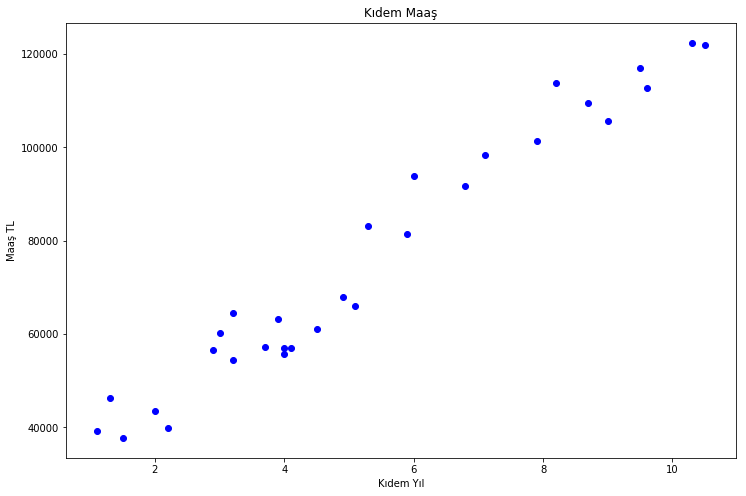

In [6]:
plt.figure(figsize=(12,8))

plt.scatter(df['Kidem'], df['Maas'], color='blue')
plt.title("Kıdem Maaş")
plt.xlabel("Kıdem Yıl")
plt.ylabel("Maaş TL")

plt.show()

# Veri setini X ve y olarak ayırma (Dikey bölme)

In [7]:
# X (büyük X) girdileri temsil eder, input, bağımsız değişkenler, girdi nitelikler, 
# feature matrix diye de adlandırılır çünkü o bir matris
X = df['Kidem'].values.reshape(-1,1)
X.shape

(30, 1)

In [8]:
# y (küçük y) output, bağımlı değişken, hedef değişken diye adlandırılır
y = df['Maas'].values
y.shape

(30,)

# Veri setini train-test olarak ayırma (yatay bölme)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.25, random_state = 142)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22, 1)
(22,)
(8, 1)
(8,)


# Lineer Regresyon Nesnesi Oluşturma (Boş model yaratma)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()

# Lineer modeli eğitme (modeli şekillendirme - veriye uydurma - eğitme)

In [13]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Eğitilmiş modelin neleri var

In [14]:
print("Katsayılar: ",regressor.coef_)
print("Sabit: ",regressor.intercept_)
print("Model parametreleri: ", regressor.get_params())

Katsayılar:  [9525.62753584]
Sabit:  24550.028678021758
Model parametreleri:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


# Eğitilmiş modelle (makine) test seti kullanarak tahmin

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
y_pred

array([ 61699.97606781,  89324.29592176,  59794.85056064, 102660.17447194,
       122663.99229721,  36933.34447462,  35028.21896745,  55032.03679272])

## Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [17]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head(20)

,y_pred,y_test
0,61699.976068,63218.0
1,89324.295922,91738.0
2,59794.850561,57189.0
3,102660.174472,113812.0
4,122663.992297,122391.0
5,36933.344475,46205.0
6,35028.218967,39343.0
7,55032.036793,54445.0


# Regression metrics

In [18]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.9764277065760226

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9650752107612409

# Grafik

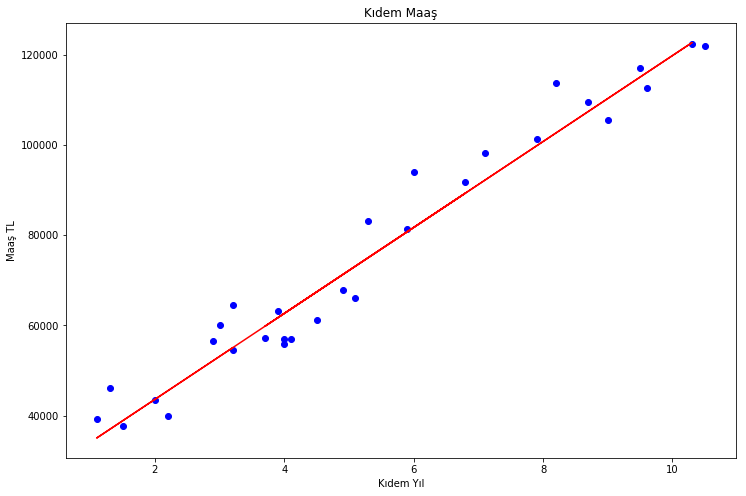

In [20]:
plt.figure(figsize=(12,8))

plt.scatter(df['Kidem'], df['Maas'], color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("Kıdem Maaş")
plt.xlabel("Kıdem Yıl")
plt.ylabel("Maaş TL")

plt.show()

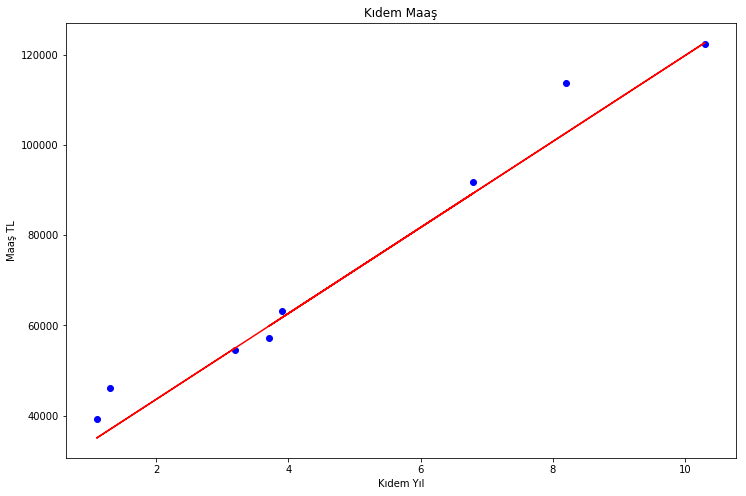

In [21]:
plt.figure(figsize=(12,8))

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("Kıdem Maaş")
plt.xlabel("Kıdem Yıl")
plt.ylabel("Maaş TL")

plt.show()

<h1 style="color:blue";>08_linear_regression_alıştırma - 2</h1>

## Çözüm-1 LabelEncoder ve OneHotEncoder ile

In [1]:
# Sirket_Harcama_Kar_Bilgileri.csv 
# veriseti çoklu regresyon

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/Sirket_Harcama_Kar_Bilgileri.csv")

# 1. Veri Keşfi

In [4]:
df.head()

,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Sehir,Kar
0,165349.20,136897.80,471784.10,Istanbul,192261.83
1,162597.70,151377.59,443898.53,Ankara,191792.06
2,153441.51,101145.55,407934.54,Kocaeli,191050.39
3,144372.41,118671.85,383199.62,Istanbul,182901.99
4,142107.34,91391.77,366168.42,Kocaeli,166187.94


## 1.1. Veri seti şemasını, boş değer sayısını görme

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
ArgeHarcamasi         50 non-null float64
YonetimGiderleri      50 non-null float64
PazarlamaHarcamasi    50 non-null float64
Sehir                 50 non-null object
Kar                   50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## 1.2. Histogram

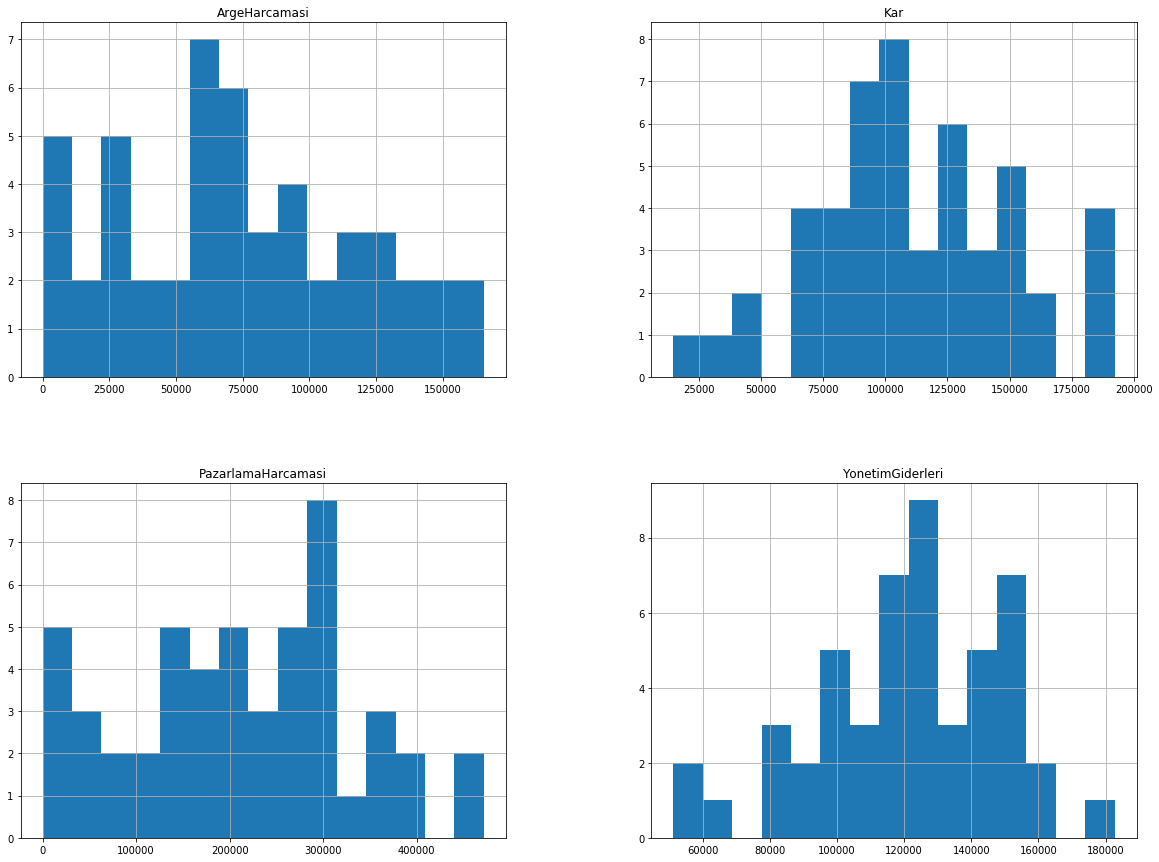

In [6]:
df.hist(bins=15, figsize=(20,15))
plt.show()

## 1.3. Korelasyonlar

In [7]:
df.corr()

,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Kar
ArgeHarcamasi,1.000000,0.241955,0.724248,0.972900
YonetimGiderleri,0.241955,1.000000,-0.032154,0.200717
PazarlamaHarcamasi,0.724248,-0.032154,1.000000,0.747766
Kar,0.972900,0.200717,0.747766,1.000000


In [8]:
# Girdi değişkenlerin hedef değişken ile korelasyonları
df.corrwith(df['Kar']).sort_values(ascending=False)

Kar                   1.000000
ArgeHarcamasi         0.972900
PazarlamaHarcamasi    0.747766
YonetimGiderleri      0.200717
dtype: float64

## 1.4. Nümerik nitelikleri inceleme

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ArgeHarcamasi,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
YonetimGiderleri,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
PazarlamaHarcamasi,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Kar,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


## 1.5. Sütunları yeniden sıralama

In [10]:
# İstediğim gibi değiştirmiyorum

# 2. Veri Temizliği ve Ön Hazırlığı

## 2.1. Kayıp veri var mı?

In [11]:
df.isnull().sum()

ArgeHarcamasi         0
YonetimGiderleri      0
PazarlamaHarcamasi    0
Sehir                 0
Kar                   0
dtype: int64

## 2.2. SimpleImputer ile boşları doldurma

In [12]:
# Boş değerim yok

## 2.3. Veriyi X,y olarak bölme (nitelikler matrisi ve hedef değişken - dikey bölme) aka Numpy Dünyasına Giriş 

In [13]:
# Hedef değişken artık en sonda
X = df.iloc[:,:-1].values
X.shape

(50, 4)

In [14]:
y = df.iloc[:,-1].values
y.shape

(50,)

## 2.4. LabelEncoder ile kategorik nitelikleri kodlama

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder_sehir = LabelEncoder()

In [16]:
X[:,3] = label_encoder_sehir.fit_transform(X[:,3])
X.shape

(50, 4)

In [17]:
X[:10,:]

array([[165349.2, 136897.8, 471784.1, 1],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 2],
       [144372.41, 118671.85, 383199.62, 1],
       [142107.34, 91391.77, 366168.42, 2],
       [131876.9, 99814.71, 362861.36, 1],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 2],
       [120542.52, 148718.95, 311613.29, 1],
       [123334.88, 108679.17, 304981.62, 0]], dtype=object)

## 2.5. OneHotEncoder ile kodlanan kategorik nitelikleri gölge değişkenler yapma

In [18]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore', categories='auto')

In [19]:
# Tek bir kategorik nitalik var. Acaba kaç farklı kategori var?
len(df.Sehir.unique())

3

In [20]:
# Bir veya daha fazla sütunu ilgilendiren dönüşümleri kolay yapabilmek için kullanışlı bir sınıf (Estimator kökenli)
# Biz burada sadece OneHotEncoder için kullanacağız.
from sklearn.compose import ColumnTransformer

In [21]:
# ct bizim kendi verdiğiiz isimdir. 
# onehotencoder'ı yukarıda yarattık. [0] ise dönüşecek niteliklerin indeks değerleridir.

ct = ColumnTransformer(
    [('one_hot_encode_with_ct', onehotencoder, [3]),], 
    remainder='passthrough'
)

In [22]:
# ColumnTransformer nesnesi ile onehotencoder nesnesini eğitip gerekli dönüşümleri gerçekleştirip X'e tekrar atayalım.
# Burada X'in boyutu(shape) değişecektir.
X = ct.fit_transform(X)

In [23]:
X.shape

(50, 6)

In [24]:
# Toplam 4 niteliğimiz vardı 3 farklı şehir için gölge değişken oluştu 7. 
# LabelEncoder ile oluşan nitelik düştü kaldı 6. Hesap doğru

In [25]:
X[:3,:]

array([[0.0, 1.0, 0.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 0.0, 1.0, 153441.51, 101145.55, 407934.54]], dtype=object)

## 2.6. Gölge Değişken Tuzağından (Dummy variable trap) Kaçınma 

In [26]:
X = X[:,1:]
X.shape

(50, 5)

## 2.7. Hedef değişken için Label Encoder

In [27]:
# Hedef niteliği zaten rakam olduğu için kodlamaya gerek yok. Ayrıca problem regresyon problemi

## 2.8. Standardizasyon FeatureScaling

In [28]:
# Harcamalar aynı türden yapmayabiliriz.

## 2.9. Veri setini train-test olarak ayırma (yatay bölme)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.25, random_state = 142)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 5)
(13, 5)
(37,)
(13,)


# 3. Model Oluşturma ve Eğitim

## 3.1. Lineer Regresyon Nesnesi Oluşturma (Boş model yaratma)

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

## 3.2. Lineer modeli eğitme (modeli şekillendirme - veriye uydurma - eğitme)

In [32]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3.3. Eğitilmiş modelle (makine) test seti kullanarak tahmin (prediction) 

In [33]:
y_pred = regressor.predict(X_test)

## 3.4. Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [34]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,159813.247738,155752.60
1,136034.415551,146121.95
2,74041.732845,90708.19
3,66245.848000,65200.33
4,172619.073397,182901.99


## 3.5. Regression metrics

### 3.5.1. explained_variance

In [35]:
# The sklearn.metrics module implements several loss, score, and utility functions to measure 
# regression performance. Some of those have been enhanced to handle the multioutput case: 
# mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

In [36]:
from sklearn.metrics import explained_variance_score

In [37]:
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.9646473388561609

### 3.5.2. mean_absolute_error

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mean_absolute_error(y_pred=y_pred, y_true=y_test)

7481.044207153125

In [40]:
import math

In [41]:
# rmse
math.sqrt(mean_absolute_error(y_pred=y_pred, y_true=y_test))

86.49302981832193

### 3.5.3. r2_score 

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test, y_pred)

0.9646383696314051

# 4. Model Anlamlılığı

In [44]:
# Model anlamlılığına ve girdi değişkenlerin modele katkısına bakmak için scikit-learn'den farklı
# bir kütüphane kullanacağız. Çünkü bunu scikit learn ile yapamıyoruz. 

In [45]:
import statsmodels.api as sm

## 4.1. Sabit ekleme

In [46]:
# Sabit Ekleme (aslında sbitin önünde bir tane x üzeri 0 var. 
# Onu temsilen yeni bir sütunu 1'ler ile dolduruyoruz)

In [47]:
X.shape

(50, 5)

In [48]:
X = sm.add_constant(X)
X.shape

(50, 6)

In [49]:
X[:5,:]

array([[1.0, 1.0, 0.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 1.0, 153441.51, 101145.55, 407934.54],
       [1.0, 1.0, 0.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 1.0, 142107.34, 91391.77, 366168.42]], dtype=object)

    Hatayı engellemek için aşağıdaki işlemi yapıyoruz.
    TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
X_opt = np.array(X, dtype=float)

In [51]:
import statsmodels.api as sm
ols_obj = sm.OLS(endog=y, exog=X_opt)

In [52]:
ols_model = ols_obj.fit()

In [53]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.34e-27
Time:                        07:18:19   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x2           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
X[:4]

array([[1.0, 1.0, 0.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 1.0, 153441.51, 101145.55, 407934.54],
       [1.0, 1.0, 0.0, 144372.41, 118671.85, 383199.62]], dtype=object)

# 5. Model Oluşturma (Geriye Doğru Eleme Yöntemi)

## 1. Tur

In [55]:
# Sabit -> X[0]
# x1 : şehir-1 -> X[1]
# x2 : şehir-2 -> X[2]
# x3 : ArgeHarcamasi -> X[3]
# x4 : YonetimGiderleri -> X[4]
# x5 : PazarlamaHarcamasi -> X[5]

In [56]:
# Demekki şehir niteliği karı açıklamada anlamsız ben bu niteliği modele hiç katmıyorum.
# Modele girecekler 0: Sabit, 3: Arge, 4: Yönetim, 5: Pazarlama

In [57]:
import statsmodels.api as sm
X_opt = np.array(X[:, [0, 3,4,5]], dtype=float)
ols_obj = sm.OLS(endog=y, exog=X_opt)

In [58]:
ols_model = ols_obj.fit()

In [59]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           4.53e-30
Time:                        07:21:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2. Tur

In [60]:
# Sabit -> X[0]
# x1 : ArgeHarcamasi -> X[3]
# x2 : YonetimGiderleri -> X[4]
# x3 : PazarlamaHarcamasi -> X[5]

In [61]:
# YonetimGiderleri niteliği karı açıklamada anlamsız bu niteliği modelden çıkarıyoruz.
# Modele girecekler 0: Sabit, 3: Arge, 5: Pazarlama

In [62]:
import statsmodels.api as sm
X_opt = np.array(X[:, [0, 3, 5]], dtype=float)
ols_obj = sm.OLS(endog=y, exog=X_opt)

In [63]:
ols_model = ols_obj.fit()

In [64]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           2.16e-31
Time:                        07:21:55   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Sabit -> X[0]
# x1 : ArgeHarcamasi -> X[3]
# x2 : PazarlamaHarcamasi -> X[5]

In [66]:
# Pazarlama harcaması çok az bir farkla anlamsız kalıyor o.06 > 0.05
# İstersek bunu da çıkarabiliriz veya kalabilir.

<h1 style="color:blue";>08_linear_regression_alıştırma - 2</h1>

## Çözüm-2 get_dummies ile

In [67]:
# Sirket_Harcama_Kar_Bilgileri.csv 
# veriseti çoklu regresyon

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df_dummy = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/Sirket_Harcama_Kar_Bilgileri.csv")

# 1. Veri Keşfi

In [70]:
df_dummy.head()

,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Sehir,Kar
0,165349.20,136897.80,471784.10,Istanbul,192261.83
1,162597.70,151377.59,443898.53,Ankara,191792.06
2,153441.51,101145.55,407934.54,Kocaeli,191050.39
3,144372.41,118671.85,383199.62,Istanbul,182901.99
4,142107.34,91391.77,366168.42,Kocaeli,166187.94


## 1.1. Veri seti şemasını, boş değer sayısını görme

In [71]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
ArgeHarcamasi         50 non-null float64
YonetimGiderleri      50 non-null float64
PazarlamaHarcamasi    50 non-null float64
Sehir                 50 non-null object
Kar                   50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## 1.2. Histogram

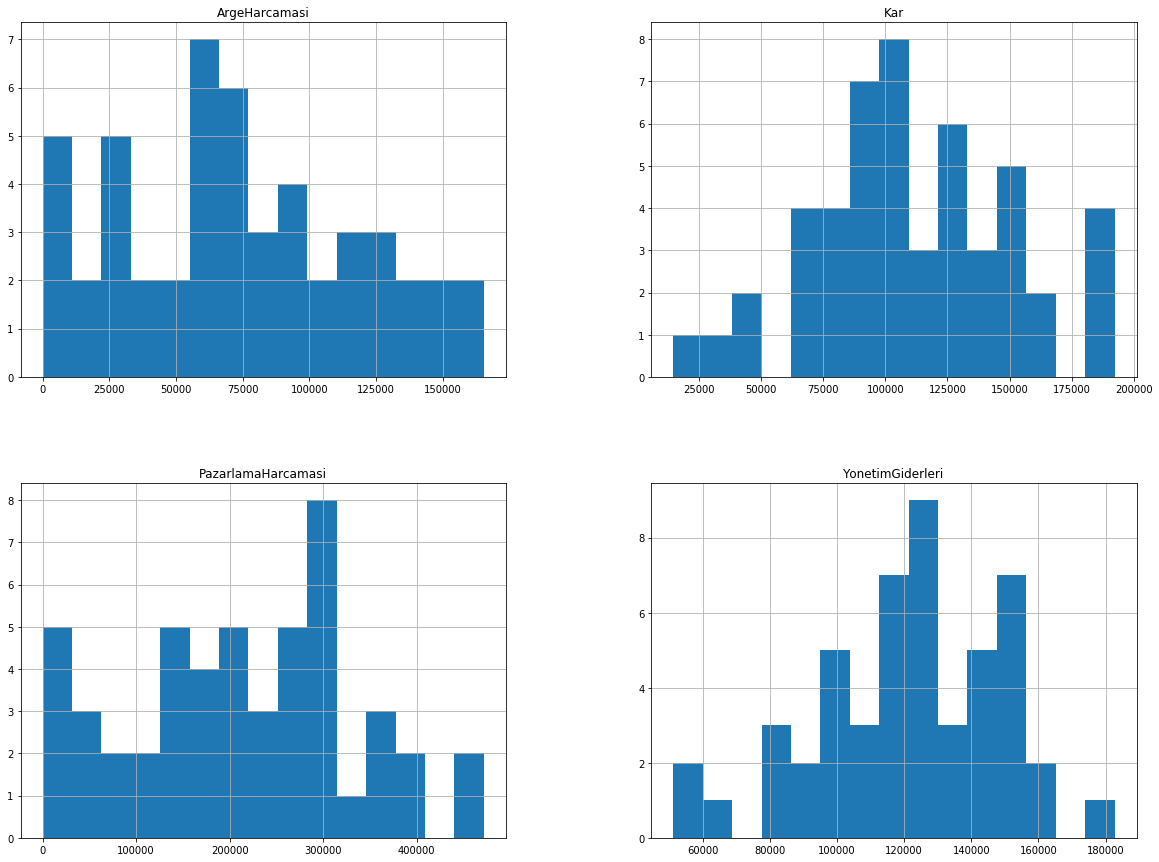

In [72]:
df_dummy.hist(bins=15, figsize=(20,15))
plt.show()

## 1.3. Korelasyonlar

In [73]:
df_dummy.corr()

,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Kar
ArgeHarcamasi,1.000000,0.241955,0.724248,0.972900
YonetimGiderleri,0.241955,1.000000,-0.032154,0.200717
PazarlamaHarcamasi,0.724248,-0.032154,1.000000,0.747766
Kar,0.972900,0.200717,0.747766,1.000000


In [74]:
# Girdi değişkenlerin hedef değişken ile korelasyonları
df_dummy.corrwith(df['Kar']).sort_values(ascending=False)

Kar                   1.000000
ArgeHarcamasi         0.972900
PazarlamaHarcamasi    0.747766
YonetimGiderleri      0.200717
dtype: float64

## 1.4. Nümerik nitelikleri inceleme

In [75]:
df_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
ArgeHarcamasi,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
YonetimGiderleri,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
PazarlamaHarcamasi,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Kar,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


## 1.5. Sütunları yeniden sıralama

In [76]:
# İstediğim gibi değiştirmiyorum

# 2. Veri Temizliği ve Ön Hazırlığı

## 2.1. Kayıp veri var mı?

In [77]:
df_dummy.isnull().sum()

ArgeHarcamasi         0
YonetimGiderleri      0
PazarlamaHarcamasi    0
Sehir                 0
Kar                   0
dtype: int64

## 2.2. SimpleImputer ile boşları doldurma

In [78]:
# Boş değerim yok

## 2.5. get_dummies() ile kategorik değişken işleme

In [79]:
df_dummy = pd.get_dummies(df_dummy, prefix=['Sehir'], drop_first=True)

In [80]:
df_dummy.head()

,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Kar,Sehir_Istanbul,Sehir_Kocaeli
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [81]:
df_dummy.columns

Index(['ArgeHarcamasi', 'YonetimGiderleri', 'PazarlamaHarcamasi', 'Kar',
       'Sehir_Istanbul', 'Sehir_Kocaeli'],
      dtype='object')

In [82]:
# Sütunları yeniden sıralama 
df_dummy = df_dummy[['ArgeHarcamasi', 'YonetimGiderleri', 'PazarlamaHarcamasi',
       'Sehir_Istanbul', 'Sehir_Kocaeli','Kar']]

In [83]:
df_dummy.head(3)

,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Sehir_Istanbul,Sehir_Kocaeli,Kar
0,165349.20,136897.80,471784.10,1,0,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,191050.39


## 2.3. Veriyi X,y olarak bölme (nitelikler matrisi ve hedef değişken - dikey bölme) aka Numpy Dünyasına Giriş 

In [84]:
# Hedef değişken artık en sonda
X = df_dummy.iloc[:,:-1].values
X.shape

(50, 5)

In [85]:
y = df.iloc[:,-1].values
y.shape

(50,)

## 2.7. Hedef değişken için Label Encoder

In [86]:
# Hedef niteliği zaten rakam olduğu için kodlamaya gerek yok. Ayrıca problem regresyon problemi

## 2.8. Standardizasyon FeatureScaling

In [87]:
# Harcamalar aynı türden yapmayabiliriz.

## 2.9. Veri setini train-test olarak ayırma (yatay bölme)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.25, random_state = 142)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 5)
(13, 5)
(37,)
(13,)


# 3. Model Oluşturma ve Eğitim

## 3.1. Lineer Regresyon Nesnesi Oluşturma (Boş model yaratma)

In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

## 3.2. Lineer modeli eğitme (modeli şekillendirme - veriye uydurma - eğitme)

In [91]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3.3. Eğitilmiş modelle (makine) test seti kullanarak tahmin (prediction) 

In [92]:
y_pred = regressor.predict(X_test)

## 3.4. Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [93]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,159813.247738,155752.60
1,136034.415551,146121.95
2,74041.732845,90708.19
3,66245.848000,65200.33
4,172619.073397,182901.99


## 3.5. Regression metrics

### 3.5.1. explained_variance

In [94]:
# The sklearn.metrics module implements several loss, score, and utility functions to measure 
# regression performance. Some of those have been enhanced to handle the multioutput case: 
# mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

In [95]:
from sklearn.metrics import explained_variance_score

In [96]:
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.9646473388562141

### 3.5.2. mean_absolute_error

In [97]:
from sklearn.metrics import mean_absolute_error

In [98]:
mean_absolute_error(y_pred=y_pred, y_true=y_test)

7481.044207171212

In [99]:
import math

In [100]:
# rmse
math.sqrt(mean_absolute_error(y_pred=y_pred, y_true=y_test))

86.49302981842648

### 3.5.3. r2_score 

In [101]:
from sklearn.metrics import r2_score

In [102]:
r2_score(y_test, y_pred)

0.9646383696314554

# 4. Model Anlamlılığı

In [103]:
# Model anlamlılığına ve girdi değişkenlerin modele katkısına bakmak için scikit-learn'den farklı
# bir kütüphane kullanacağız. Çünkü bunu scikit learn ile yapamıyoruz. 

In [104]:
import statsmodels.api as sm

## 4.1. Sabit ekleme

In [105]:
# Sabit Ekleme (aslında sbitin önünde bir tane x üzeri 0 var. 
# Onu temsilen yeni bir sütunu 1'ler ile dolduruyoruz)

In [106]:
X.shape

(50, 5)

In [107]:
X = sm.add_constant(X)
X.shape

(50, 6)

In [108]:
X[:5,:]

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05,
        0.0000000e+00, 1.0000000e+00]])

    Hatayı engellemek için aşağıdaki işlemi yapıyoruz.
    TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [109]:
X_opt = np.array(X, dtype=float)

In [110]:
import statsmodels.api as sm
ols_obj = sm.OLS(endog=y, exog=X_opt)

In [111]:
ols_model = ols_obj.fit()

In [112]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.34e-27
Time:                        07:23:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x5           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
df_dummy.head()

,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Sehir_Istanbul,Sehir_Kocaeli,Kar
0,165349.20,136897.80,471784.10,1,0,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,191050.39
3,144372.41,118671.85,383199.62,1,0,182901.99
4,142107.34,91391.77,366168.42,0,1,166187.94


# 5. Model Oluşturma (Geriye Doğru Eleme Yöntemi)

## 1. Tur

In [ ]:
# Sabit const -> 0.000
# ArgeHarcamasi x1 -> 0.000
# YonetimGiderleri x2 -> 0.608
# PazarlamaHarcamasi x3 -> 0.123
# Sehir_Istanbul x4 -> 0.990
# Sehir_Kocaeli x5 -> 0.953

In [77]:
# Demekki şehir niteliği karı açıklamada anlamsız ben bu niteliği modele hiç katmıyorum.
# Modele girecekler 0: Sabit, 1: Arge, 2: Yönetim, 3: Pazarlama

In [115]:
import statsmodels.api as sm
X_opt = np.array(X[:, [0, 1,2,3]], dtype=float)
ols_obj = sm.OLS(endog=y, exog=X_opt)

In [116]:
ols_model = ols_obj.fit()

In [118]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           4.53e-30
Time:                        07:30:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2. Tur

In [81]:
# Sabit const -> 0.000
# ArgeHarcamasi x1 -> 0.000
# YonetimGiderleri x2 -> 0.602
# PazarlamaHarcamasi x3 -> 0.105

In [82]:
# YonetimGiderleri niteliği karı açıklamada anlamsız bu niteliği modelden çıkarıyoruz.
# Modele girecekler 0: Sabit, 1: Arge, 3: Pazarlama

In [119]:
import statsmodels.api as sm
X_opt = np.array(X[:, [0, 1, 3]], dtype=float)
ols_obj = sm.OLS(endog=y, exog=X_opt)

In [120]:
ols_model = ols_obj.fit()

In [121]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           2.16e-31
Time:                        07:31:24   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
# Sabit -> X[0]
# x1 : ArgeHarcamasi 
# x2 : PazarlamaHarcamasi

In [87]:
# Pazarlama harcaması çok az bir farkla anlamsız kalıyor o.06 > 0.05
# İstersek bunu da çıkarabiliriz veya kalabilir.

# Ödev-23

In [88]:
# PozisyonSeviyeMaas.csv 
# veri seti ile basit doğrusal regresyon yapınız.
# Sonuçları polinom regresyon ile karşılaştırınız

In [89]:
df = pd.read_csv("D:/Datasets/PozisyonSeviyeMaas.csv")

In [101]:
df.head(15)

,Pozisyon,Seviye,Maas
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [90]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [91]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
print("Katsayılar: ",regressor.coef_)
print("Sabit: ",regressor.intercept_)
print("Model parametreleri: ", regressor.get_params())

Katsayılar:  [80878.78787879]
Sabit:  -195333.33333333337
Model parametreleri:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [93]:
y_pred = regressor.predict(X)

In [94]:
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [95]:
y_test = y.copy()
y_test

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [96]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head(20)

,y_pred,y_test
0,-114454.545455,45000
1,-33575.757576,50000
2,47303.030303,60000
3,128181.818182,80000
4,209060.606061,110000
5,289939.393939,150000
6,370818.181818,200000
7,451696.969697,300000
8,532575.757576,500000
9,613454.545455,1000000


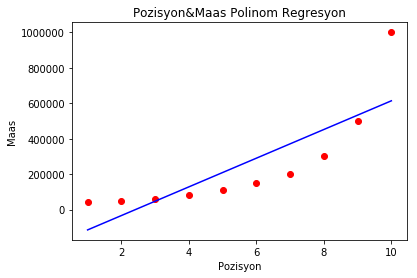

In [97]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Pozisyon&Maas Polinom Regresyon')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()

In [98]:
from sklearn.metrics import r2_score

In [99]:
r2_score(y_pred=y_pred, y_true=y_test)

0.6690412331929895